In [32]:
# import libraries
import numpy as np
import os

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import pandas as pd

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from yellowbrick.cluster import SilhouetteVisualizer

In [33]:
# import csv file
# pay attention to which file is being used
df = pd.read_csv('Archive/df_product_active.csv')

In [34]:
df

,product_id,product_name,category,subcategory,product_date_first_sale,product_date_last_sale,product_selling_days_f2l,product_selling_days_f2l_l,days_since_last_sale,total_quantity,...,total_profit,avg_profit_per_order,avg_orders_per_month,avg_discount_per_order,first_order_month,first_order_year,first_order_year_month,PLC_Category,avg_mth_profit_contribution,avg_mth_profit_contribution_category
0,FUR-BO-10000330,"Sauder Camden County Barrister Bookcase, Plank...",Furniture,Bookcases,2014-11-28,2017-05-30,914,914,214,10,...,24.1960,8.065333,0.079787,0.100000,11,2014,2014-11,5_OBSOLETE,0.794179,1_Low
1,FUR-BO-10001519,O'Sullivan 3-Shelf Heavy-Duty Bookcases,Furniture,Bookcases,2015-04-16,2017-12-09,968,968,21,22,...,147.0942,29.418840,0.151668,0.170000,4,2015,2015-04,3_MATURITY,4.558705,2_Medium
2,FUR-BO-10001619,O'Sullivan Cherrywood Estates Traditional Book...,Furniture,Bookcases,2016-11-24,2017-01-21,58,58,343,6,...,27.1936,13.596800,0.149626,0.100000,11,2016,2016-11,5_OBSOLETE,14.065655,3_High
3,FUR-BO-10001811,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",Furniture,Bookcases,2015-03-01,2017-09-23,937,937,98,26,...,15.0490,1.881125,0.231884,0.316250,3,2015,2015-03,3_MATURITY,0.481825,1_Low
4,FUR-BO-10002213,DMI Eclipse Executive Suite Bookcases,Furniture,Bookcases,2014-09-20,2017-06-25,1009,1009,188,27,...,90.1764,15.029400,0.150376,0.183333,9,2014,2014-09,5_OBSOLETE,2.681162,2_Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,TEC-PH-10004896,Nokia Lumia 521 (T-Mobile),Technology,Phones,2014-11-19,2017-03-26,858,858,279,20,...,83.9720,16.794400,0.131926,0.160000,11,2014,2014-11,5_OBSOLETE,2.936084,1_Low
1296,TEC-PH-10004908,Panasonic KX TS3282W Corded phone,Technology,Phones,2014-12-31,2017-11-12,1047,1047,48,25,...,178.4790,25.497000,0.191781,0.228571,12,2014,2014-12,4_DECLINE,5.114011,2_Medium
1297,TEC-PH-10004912,Cisco SPA112 2 Port Phone Adapter,Technology,Phones,2014-07-11,2017-12-01,1239,1239,29,11,...,87.3705,29.123500,0.070978,0.133333,7,2014,2014-07,3_MATURITY,2.115508,1_Low
1298,TEC-PH-10004922,RCA Visys Integrated PBX 8-Line Router,Technology,Phones,2014-04-07,2017-01-20,1019,1019,344,19,...,130.6305,26.126100,0.110051,0.120000,4,2014,2014-04,5_OBSOLETE,3.845844,2_Medium


In [35]:
# eliminate columns in dataframe df
# rename 'total_profit' to 'Amount', 'count_orders' to 'Frequency', 'days_since_last_sale' to 'Recency'

df = df.rename(columns={
    'total_profit': 'Total_Profit',
    'count_orders': 'Total_Orders',
    'count_orders_discount': 'Orders_with_Discount',
    'days_since_last_sale': 'Recency',
    'total_quantity': 'Units',
    'avg_mth_profit_contribution': 'Avg_Profit_Contribution'
})


# Open question: total profit is maybe not fair for more recent or expensive products, hence average profit contribution per month potentially more fair


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   product_id                            1300 non-null   object 
 1   product_name                          1300 non-null   object 
 2   category                              1300 non-null   object 
 3   subcategory                           1300 non-null   object 
 4   product_date_first_sale               1300 non-null   object 
 5   product_date_last_sale                1300 non-null   object 
 6   product_selling_days_f2l              1300 non-null   int64  
 7   product_selling_days_f2l_l            1300 non-null   int64  
 8   Recency                               1300 non-null   int64  
 9   Units                                 1300 non-null   int64  
 10  Total_Orders                          1300 non-null   int64  
 11  Orders_with_Disco

In [37]:
# Elimination of columns
# Drop all object columns except 'product_id'
cols_to_drop = [col for col in df.select_dtypes(include='object').columns if col != 'product_id']
df = df.drop(columns=cols_to_drop)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  1300 non-null   object 
 1   product_selling_days_f2l    1300 non-null   int64  
 2   product_selling_days_f2l_l  1300 non-null   int64  
 3   Recency                     1300 non-null   int64  
 4   Units                       1300 non-null   int64  
 5   Total_Orders                1300 non-null   int64  
 6   Orders_with_Discount        1300 non-null   int64  
 7   discount_ratio              1300 non-null   float64
 8   Total_Profit                1300 non-null   float64
 9   avg_profit_per_order        1300 non-null   float64
 10  avg_orders_per_month        1300 non-null   float64
 11  avg_discount_per_order      1300 non-null   float64
 12  first_order_month           1300 non-null   int64  
 13  first_order_year            1300 

In [38]:
# drop first_order_month and first_order_year
df = df.drop(columns=['first_order_month', 'first_order_year'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  1300 non-null   object 
 1   product_selling_days_f2l    1300 non-null   int64  
 2   product_selling_days_f2l_l  1300 non-null   int64  
 3   Recency                     1300 non-null   int64  
 4   Units                       1300 non-null   int64  
 5   Total_Orders                1300 non-null   int64  
 6   Orders_with_Discount        1300 non-null   int64  
 7   discount_ratio              1300 non-null   float64
 8   Total_Profit                1300 non-null   float64
 9   avg_profit_per_order        1300 non-null   float64
 10  avg_orders_per_month        1300 non-null   float64
 11  avg_discount_per_order      1300 non-null   float64
 12  Avg_Profit_Contribution     1300 non-null   float64
dtypes: float64(6), int64(6), object(1

## Feature selection |  Principle Component Analysis (PCA)

Explained variance ratio by principal components:
[3.23713164e-01 2.37146363e-01 1.65934559e-01 1.34976993e-01
 7.62641613e-02 1.94625391e-02 1.60510922e-02 9.69521995e-03
 8.01570272e-03 5.19113597e-03 3.54906927e-03 2.38703188e-34]

Feature contributions to the first principal component:
Orders_with_Discount          0.439228
Total_Orders                  0.428109
Units                         0.397576
product_selling_days_f2l_l    0.359125
product_selling_days_f2l      0.359125
avg_discount_per_order        0.290975
discount_ratio                0.262957
avg_orders_per_month          0.121142
Total_Profit                  0.005241
avg_profit_per_order         -0.054607
Avg_Profit_Contribution      -0.064268
Recency                      -0.179347
Name: PC1, dtype: float64


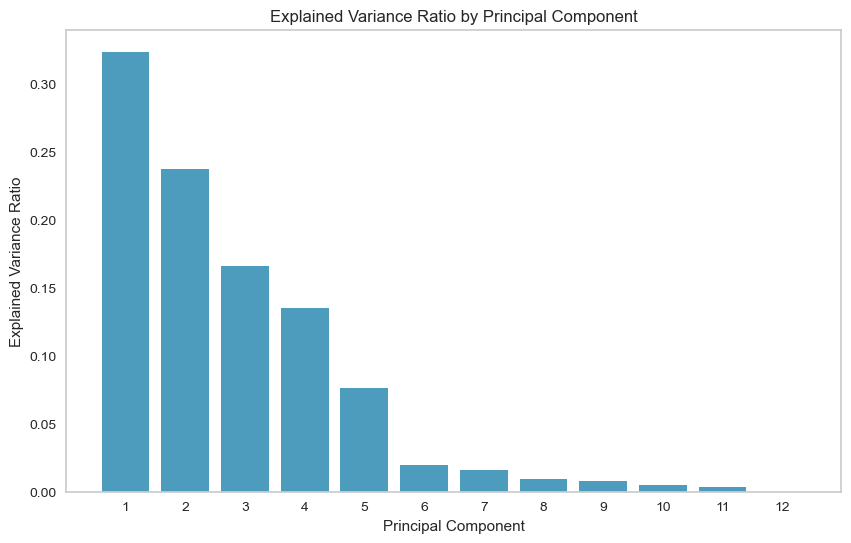

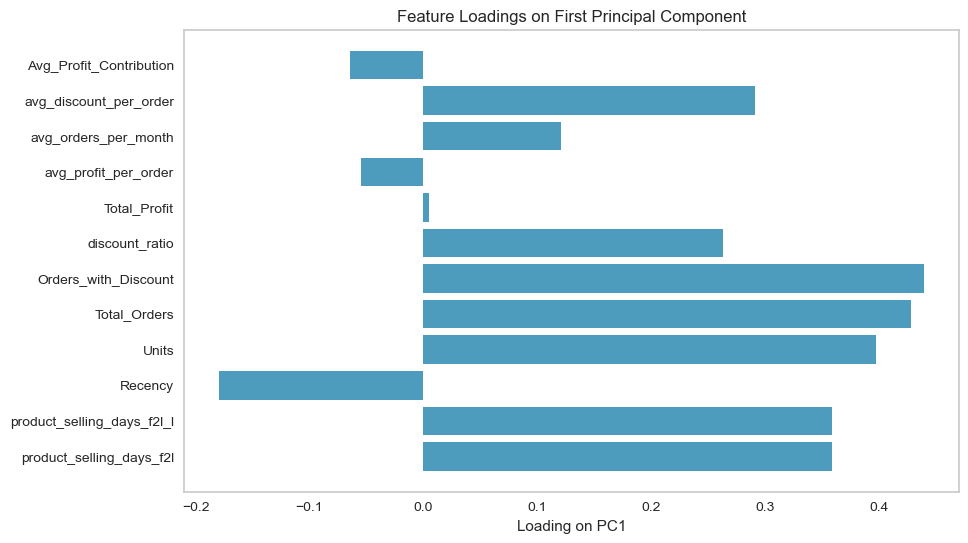


Top 10 important features for clustering based on PCA:
['Orders_with_Discount', 'Total_Orders', 'Units', 'product_selling_days_f2l_l', 'product_selling_days_f2l', 'avg_discount_per_order', 'discount_ratio', 'Recency', 'avg_orders_per_month', 'Avg_Profit_Contribution']


c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.



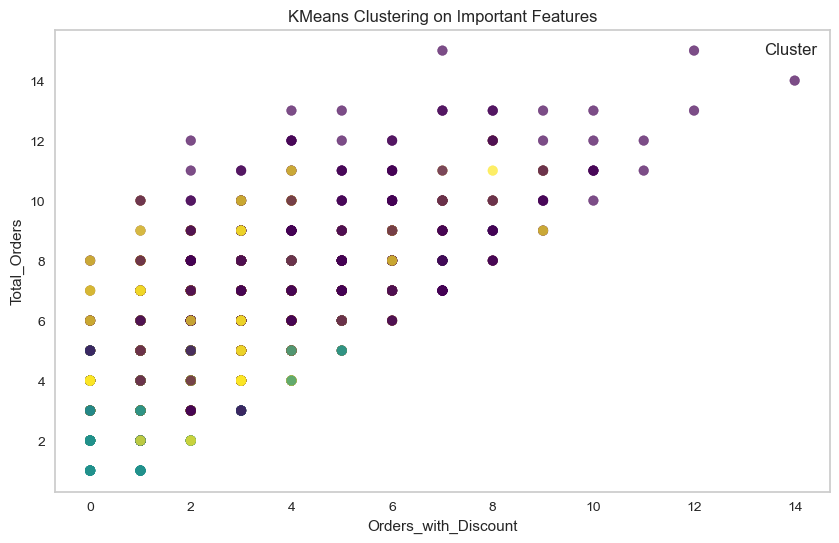

In [39]:
# Use Principal Component Analysis (PCA) to evaluate feature importance for clustering

from sklearn.decomposition import PCA

# Select only numeric columns for PCA
numeric_df = df.select_dtypes(include=[np.number])

# Standardize the data before PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_df_scaled = scaler.fit_transform(numeric_df)

# Fit PCA
pca = PCA()
pca.fit(numeric_df_scaled)

# Display explained variance ratio and feature contributions (loadings)
explained_variance = pca.explained_variance_ratio_
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(numeric_df.columns))],
    index=numeric_df.columns
)

print("Explained variance ratio by principal components:")
print(explained_variance)
print("\nFeature contributions to the first principal component:")
print(loadings['PC1'].sort_values(ascending=False))

# Visualize the explained variance ratio
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()
# Visualize the loadings of the first two principal components
plt.figure(figsize=(10, 6))
plt.barh(loadings.index, loadings['PC1'], alpha=0.7)
plt.xlabel('Loading on PC1')
plt.title('Feature Loadings on First Principal Component')
plt.grid()
plt.show()
# Use the explained variance ratio and loadings to identify important features for clustering
# Features with high loadings on the first few principal components are likely to be important for clustering
# Select features with high loadings on the first principal component
important_features = loadings['PC1'].abs().nlargest(10).index.tolist()
print("\nTop 10 important features for clustering based on PCA:")
print(important_features)
# Use the important features for clustering
from sklearn.cluster import KMeans
# Fit KMeans clustering using the important features
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(numeric_df[important_features])
# Add cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df[important_features[0]], df[important_features[1]], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel(important_features[0])
plt.ylabel(important_features[1])
plt.title('KMeans Clustering on Important Features')
plt.legend(*plt.gca().get_legend_handles_labels(), title="Cluster")
plt.grid()
plt.show()


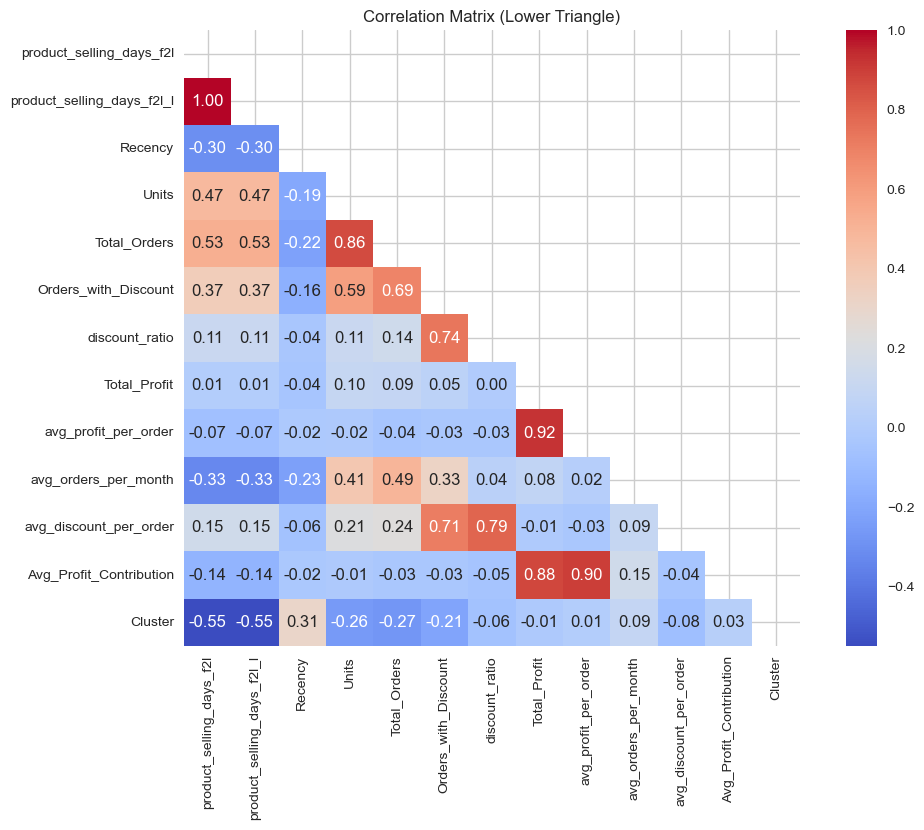

In [40]:
import seaborn as sns

# Compute and display the correlation matrix for df
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix (Lower Triangle)")
plt.show()

In [41]:
df = df[['product_id', 'Total_Orders', 'Orders_with_Discount', 'Units']]

df

,product_id,Total_Orders,Orders_with_Discount,Units
0,FUR-BO-10000330,3,2,10
1,FUR-BO-10001519,5,3,22
2,FUR-BO-10001619,2,1,6
3,FUR-BO-10001811,8,8,26
4,FUR-BO-10002213,6,6,27
...,...,...,...,...
1295,TEC-PH-10004896,5,3,20
1296,TEC-PH-10004908,7,7,25
1297,TEC-PH-10004912,3,2,11
1298,TEC-PH-10004922,5,3,19


Outlier treatment

In [42]:
# copy from wine or bike data set or Copilot (1.5 IQR)
# Outlier treatment using 1.5*IQR rule for each numerical column
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df.reset_index(drop=True, inplace=True)

df

# Comment: Takes out 857 rows out of 1894 rows (~45% of the data), if applied with all numerical columns still included
# Comment: Takes out 473 rows out of 1894 rows (~25% of the data), if applied with all numerical columns still included


,product_id,Total_Orders,Orders_with_Discount,Units
0,FUR-BO-10000330,3,2,10
1,FUR-BO-10001519,5,3,22
2,FUR-BO-10001619,2,1,6
3,FUR-BO-10001811,8,8,26
4,FUR-BO-10002213,6,6,27
...,...,...,...,...
1243,TEC-PH-10004896,5,3,20
1244,TEC-PH-10004908,7,7,25
1245,TEC-PH-10004912,3,2,11
1246,TEC-PH-10004922,5,3,19


Attention : Limit to less columns first, and the IQR -> Anticipated effect: less records deleted.

Scaling

In [43]:
from sklearn.preprocessing import StandardScaler

# Rescaling the attributes
rfm_df = df[['Total_Orders', 'Orders_with_Discount', 'Units']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Total_Orders', 'Orders_with_Discount', 'Units']
rfm_df_scaled.head()


,Total_Orders,Orders_with_Discount,Units
0,-1.154260,-0.321457,-1.138371
1,-0.229073,0.231892,0.131517
2,-1.616854,-0.874806,-1.561666
3,1.158708,2.998640,0.554813
4,0.233521,1.891941,0.660636


## Dimensional Visualizations

Inspect your data and consider outlier removal and standardization/normalization.

In [44]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(
    go.Scatter(
        x=rfm_df_scaled["Total_Orders"], 
        y=rfm_df_scaled["Orders_with_Discount"], 
        mode="markers"
    ),
    row=1, col=1,
)

fig.update_xaxes(title_text="Total_Orders", row=1, col=1)
fig.update_yaxes(title_text="Orders_with_Discount", row=1, col=1)

fig.add_trace(
    go.Scatter(
        x=rfm_df_scaled["Total_Orders"], 
        y=rfm_df_scaled["Units"], 
        mode="markers"
    ),
    row=1, col=2
)

fig.update_xaxes(title_text="Total_Orders", row=1, col=2)
fig.update_yaxes(title_text="Units", row=1, col=2)

fig.add_trace(
    go.Scatter(
        x=rfm_df_scaled["Orders_with_Discount"], 
        y=rfm_df_scaled["Units"], 
        mode="markers"
    ),
    row=1, col=3
)

fig.update_xaxes(title_text="Orders_with_Discount", row=1, col=3)
fig.update_yaxes(title_text="Units", row=1, col=3)

In [45]:
px.scatter_3d(rfm_df_scaled, x="Total_Orders", y="Orders_with_Discount", z="Units", width=600, height=500)

## Elbow method

In [46]:
inertia = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=420).fit(rfm_df_scaled.values)
    inertia.append(kmeans.inertia_)
    
inertia

c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.

c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

[3744.000000000001,
 1801.309258533262,
 1304.3142393119624,
 1048.0182545770572,
 878.2503984655355,
 767.7472009121178,
 684.6383463356626,
 619.9213781706984,
 574.2033127991136]

In [47]:
px.line(
    x=range(1, 10), 
    y=inertia,
    labels={
        "y": "Inertia", 
        "x": "Cluster #"
    },
    width=300, height=500,
    title="Elbow method"
)

## Silhouette Analysis

[Silhouette Visualizer](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html) comes from the `yellowbrick` package, which will need to be installed in your Anaconda Environment.

In [48]:
k_clusters = 2 # increment to compare different cluster #s
kmeans = KMeans(n_clusters=k_clusters, random_state=420) 
silhouette_avg = silhouette_score(rfm_df_scaled, kmeans.fit_predict(rfm_df_scaled.values))
silhouette_avg

c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\MP_Laptop\anaconda3\envs\EDA_Marc\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



0.426720017369043

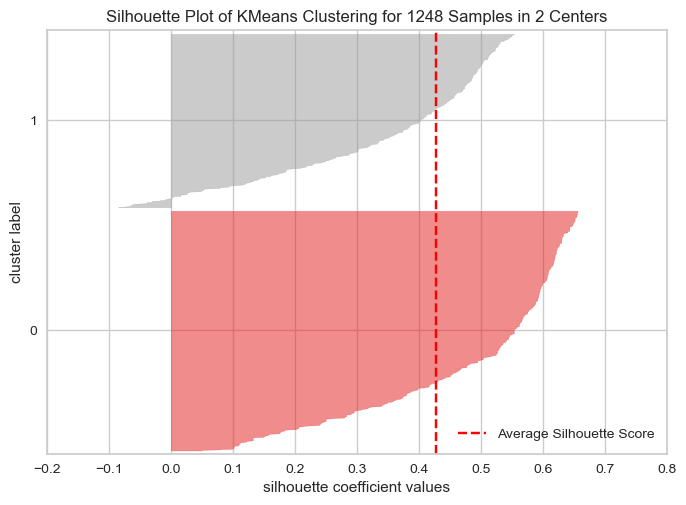

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1248 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [49]:
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(rfm_df_scaled.values)
visualizer.show()

In [50]:
from sklearn.metrics import davies_bouldin_score

# modify rfm_df_scaled and add cluster labels
df_preds = rfm_df_scaled.copy()
df_preds["cluster"] = kmeans.labels_

db_index = davies_bouldin_score(rfm_df_scaled, kmeans.labels_)
# print(f"Davies-Bouldin Index (KMeans, n_clusters={k_clusters}): {db_index:.3f}")

px.scatter_3d(
    df_preds, 
    x="Total_Orders", y="Orders_with_Discount", z="Units", 
    height=500, width=600, color="cluster", 
    title=f"KMeans | {k_clusters} Clusters<br>Silhouette Average: {silhouette_avg:.3f}  |  Davies-Bouldin Index: {db_index:.3f}"
)

In [51]:
# Bring cluster results (labels) back to original dataframe df before scaling 

# Merge cluster labels from df_preds back to the original df using index alignment
df_with_clusters = df.copy()
df_with_clusters = df_with_clusters.join(df_preds[["cluster"]])

df_with_clusters.head()

,product_id,Total_Orders,Orders_with_Discount,Units,cluster
0,FUR-BO-10000330,3,2,10,0
1,FUR-BO-10001519,5,3,22,0
2,FUR-BO-10001619,2,1,6,0
3,FUR-BO-10001811,8,8,26,1
4,FUR-BO-10002213,6,6,27,1


In [52]:
px.scatter_3d(df_with_clusters, x="Total_Orders", y="Orders_with_Discount", z="Units", color="cluster", width=600, height=500)

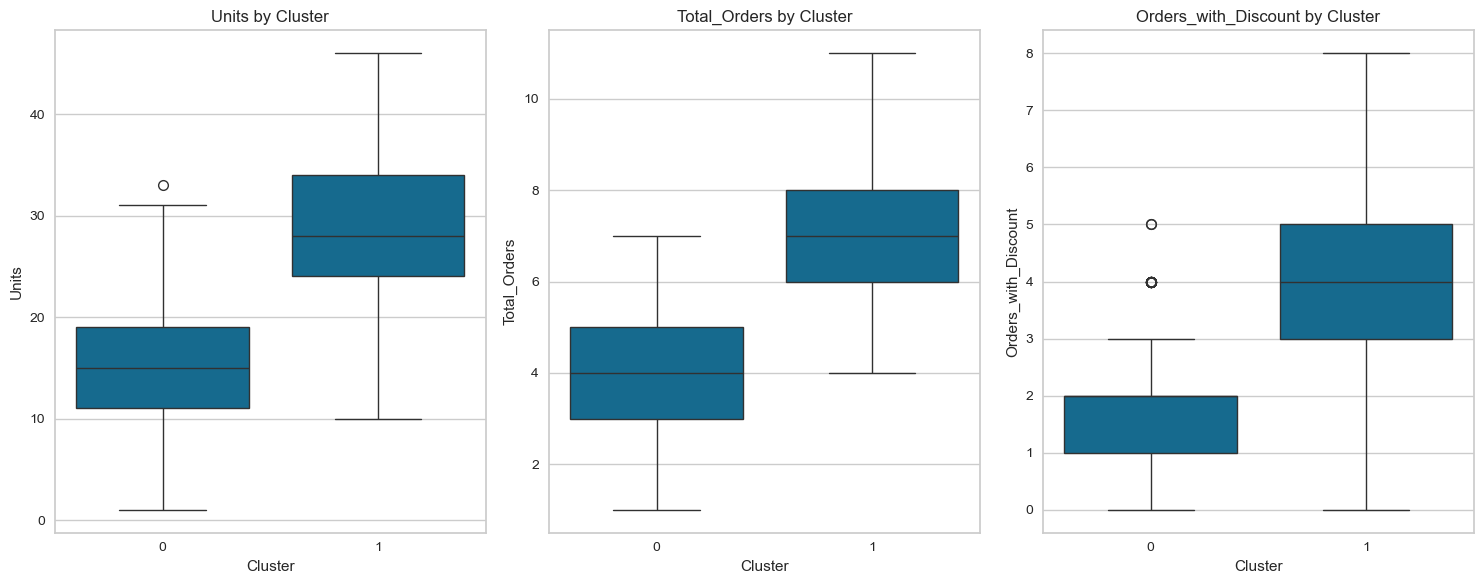

In [53]:
import seaborn as sns

# Create boxplot with cluster results. three boxplots next to each other. One box plot per feature ('Units', 'Total_Orders', Orders_with_Discount')
       
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
features = ['Units', 'Total_Orders', 'Orders_with_Discount']

for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='cluster', y=feature, data=df_with_clusters)
    plt.title(f'{feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

## DBSCAN

1. Logic to find best setting for DBSCAN

In [54]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [55]:
neighbors = NearestNeighbors(n_neighbors=6) # 2*3 features = 6 | textbook says 2*number of features
# fit the model
neighbors_fit = neighbors.fit(rfm_df_scaled)
distances, indices = neighbors_fit.kneighbors(rfm_df_scaled)

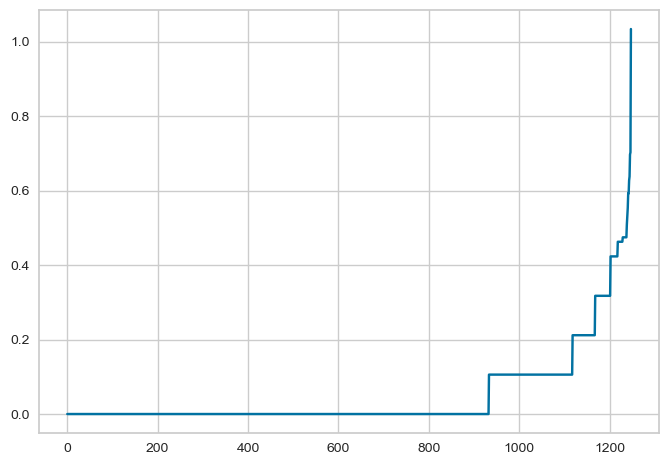

In [56]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

# Points sorted by distance to the 6th nearest neighbor (see setting above)

2. Using DB Scan

In [57]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

# DBSCAN does not require the number of clusters to be set explicitly.
# Instead, it uses the parameters 'eps' (maximum distance between two samples for them to be considered as in the same neighborhood)
# and 'min_samples' (number of samples in a neighborhood for a point to be considered as a core point).

dbscan = DBSCAN(eps=0.5, min_samples=66)  # Number of clusters is NOT set here
dbscan_labels = dbscan.fit_predict(rfm_df_scaled)

# Observation1: (eps=0.5, min_samples=5) brought out 8 clusters & 0.031 silhouette score
# Observation2: (eps=0.5, min_samples=60) brought out 2 clusters & 0.359 silhouette score
# Observation3: (eps=0.5, min_samples=65) brought out 2 clusters & 0.439 silhouette score
# Observation3: (eps=0.5, min_samples=66) brought out 2 clusters & 0.445 silhouette score

# Add DBSCAN cluster labels to the dataframe
df_preds['dbscan_cluster'] = dbscan_labels

print(f"DBSCAN identified {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)} clusters (excluding noise).")

# Visualize DBSCAN clusters in 3D
# Compute silhouette average (excluding noise points, i.e., dbscan_cluster == -1)
mask = df_preds["dbscan_cluster"] != -1
if mask.sum() > 1 and len(set(df_preds.loc[mask, "dbscan_cluster"])) > 1:
    dbscan_silhouette_avg = silhouette_score(
        rfm_df_scaled.loc[mask], df_preds.loc[mask, "dbscan_cluster"]
    )
    db_index_dbscan = davies_bouldin_score(rfm_df_scaled.loc[mask], df_preds.loc[mask, "dbscan_cluster"])
    plot_title = "DBSCAN Clustering on RFM Data"
else:
    dbscan_silhouette_avg = None
    db_index_dbscan = None
    plot_title = "DBSCAN Clustering on RFM Data"

fig = px.scatter_3d(
    df_preds,
    x="Total_Orders", y="Orders_with_Discount", z="Units",
    color="dbscan_cluster",
    height=500, width=600,
    title=plot_title
)
fig.show()

if dbscan_silhouette_avg is not None and db_index_dbscan is not None:
    n_clusters_identified = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    print(f"Silhouette Avg (excluding noise): {dbscan_silhouette_avg:.3f}")
    print(f"Davies-Bouldin Index (excluding noise): {db_index_dbscan:.3f}")
    print(f"Number of clusters identified (excluding noise): {n_clusters_identified}")
else:
    print("Silhouette Avg: N/A (not enough clusters)")
    print("Davies-Bouldin Index: N/A (not enough clusters)")



DBSCAN identified 2 clusters (excluding noise).


Silhouette Avg (excluding noise): 0.445
Davies-Bouldin Index (excluding noise): 0.826
Number of clusters identified (excluding noise): 2


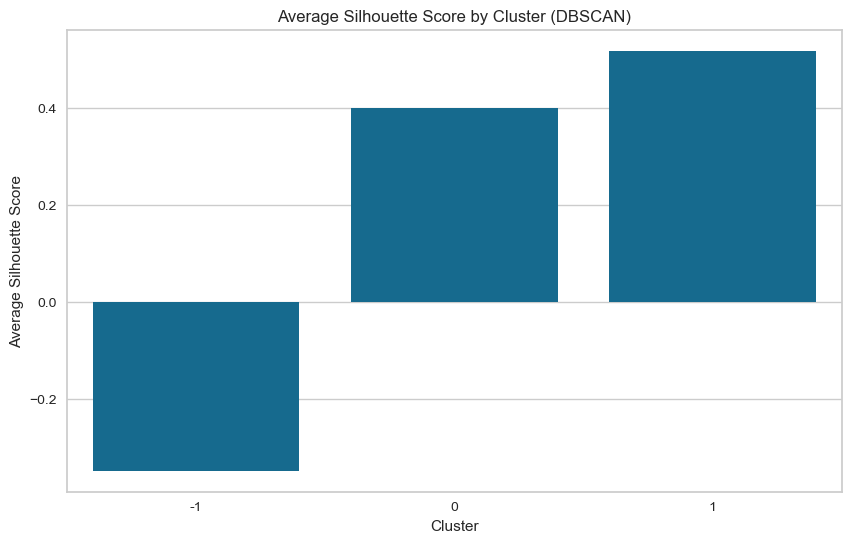

Cluster category = -1 refers to noise points (outliers) detected by DBSCAN.


In [58]:
# Calculate silhouette score for each cluster
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate silhouette scores for each sample
silhouette_vals = silhouette_samples(rfm_df_scaled, df_preds['dbscan_cluster'])
# Create a DataFrame for silhouette scores
silhouette_df = pd.DataFrame({
    'Silhouette Score': silhouette_vals,
    'Cluster': df_preds['dbscan_cluster']
})
# Calculate average silhouette score for each cluster
silhouette_avg_per_cluster = silhouette_df.groupby('Cluster')['Silhouette Score'].mean().reset_index()
# Plot silhouette scores by cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Silhouette Score', data=silhouette_avg_per_cluster)
plt.title('Average Silhouette Score by Cluster (DBSCAN)')
plt.xlabel('Cluster')
plt.ylabel('Average Silhouette Score')
plt.show()
# Save the dataframe with cluster labels to a CSV file 
df_preds.to_csv('Archive/df_product_active_clusters.csv', index=False)

# In DBSCAN, cluster label -1 indicates noise points (outliers) that do not belong to any cluster.
# All samples assigned to cluster -1 are considered noise by the DBSCAN algorithm.
print("Cluster category = -1 refers to noise points (outliers) detected by DBSCAN.")

# Fuzzy C means

In [59]:
# Fuzzy K-Means (Fuzzy C-Means) clustering


import skfuzzy as fuzz
from sklearn.metrics import silhouette_score, davies_bouldin_score


# Transpose the data for skfuzzy (features x samples)
data = rfm_df_scaled.values.T

# Set number of clusters (e.g., 2 for comparison)
n_clusters = 2

# Run fuzzy c-means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None, seed=42
)

# Assign each sample to the cluster with highest membership
fuzzy_labels = np.argmax(u, axis=0)

# Add fuzzy cluster labels to df_preds
df_preds['fuzzy_cluster'] = fuzzy_labels

# Visualize fuzzy clusters in 3D
fig = px.scatter_3d(
    df_preds,
    x="Total_Orders", y="Orders_with_Discount", z="Units",
    color="fuzzy_cluster",
    height=500, width=600,
    title=f"Fuzzy C-Means Clustering (n_clusters={n_clusters})"
)
fig.show()

# Calculate silhouette score and Davies-Bouldin index for fuzzy clusters
silhouette_fuzzy = silhouette_score(rfm_df_scaled, fuzzy_labels)
db_index_fuzzy = davies_bouldin_score(rfm_df_scaled, fuzzy_labels)

print(f"Silhouette Score (Fuzzy C-Means, n_clusters={n_clusters}): {silhouette_fuzzy:.3f}")
print(f"Davies-Bouldin Index (Fuzzy C-Means, n_clusters={n_clusters}): {db_index_fuzzy:.3f}")

Silhouette Score (Fuzzy C-Means, n_clusters=2): 0.425
Davies-Bouldin Index (Fuzzy C-Means, n_clusters=2): 0.890


# Hierarchical clustering

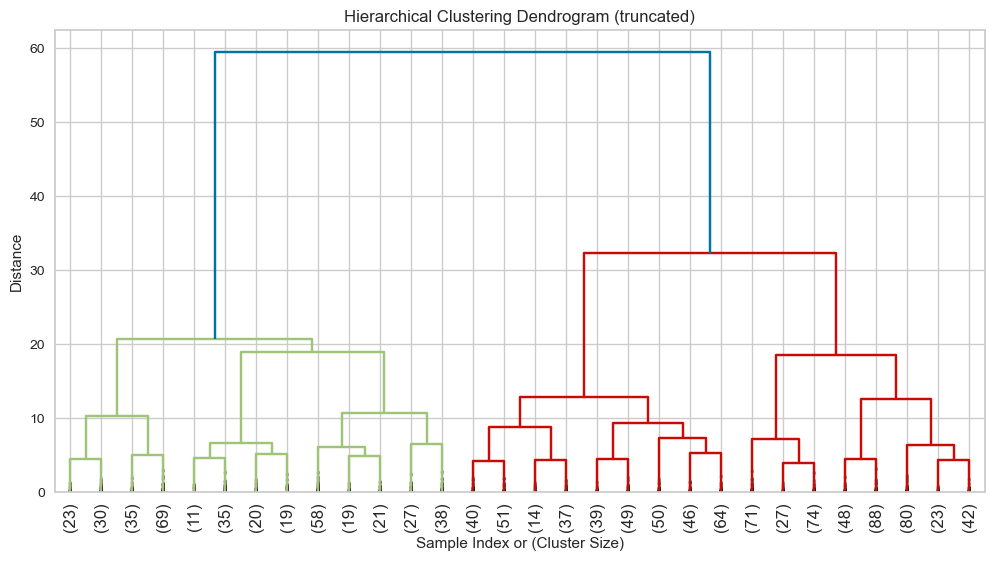

Silhouette Score (Hierarchical, n_clusters=2): 0.408
Davies-Bouldin Index (Hierarchical, n_clusters=2): 0.929


In [60]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Please apply hierarchical clustering method to rfm_df_scaled

import matplotlib.pyplot as plt

# Perform hierarchical clustering using Ward's method
Z = linkage(rfm_df_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()

# Assign cluster labels (e.g., 2 clusters for comparison)
n_clusters = 2
hierarchical_labels = fcluster(Z, n_clusters, criterion='maxclust')

# Add hierarchical cluster labels to df_preds
df_preds['hierarchical_cluster'] = hierarchical_labels

# Visualize clusters in 3D
px.scatter_3d(
    df_preds,
    x="Total_Orders", y="Orders_with_Discount", z="Units",
    color="hierarchical_cluster",
    height=500, width=600,
    title=f"Hierarchical Clustering (n_clusters={n_clusters})"
)

# Calculate silhouette score
sil_score = silhouette_score(rfm_df_scaled, hierarchical_labels)
# Calculate Davies-Bouldin index
db_index = davies_bouldin_score(rfm_df_scaled, hierarchical_labels)

print(f"Silhouette Score (Hierarchical, n_clusters={n_clusters}): {sil_score:.3f}")
print(f"Davies-Bouldin Index (Hierarchical, n_clusters={n_clusters}): {db_index:.3f}")